## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline


## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("./Resources/bitstamp.csv"), 
    index_col= "Timestamp", 
    parse_dates = True, 
    infer_datetime_format= True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()
bitstamp.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("./Resources/coinbase.csv"), 
    index_col= "Timestamp", 
    parse_dates = True, 
    infer_datetime_format= True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].str.replace("$", "")

C:\Users\CarlMikel\AppData\Local\Temp\ipykernel_8440\1426217303.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].str.replace("$", "")


### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()
bitstamp = bitstamp.drop_duplicates()

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase = coinbase.dropna()

coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$", "")

coinbase.loc[:, "Close"] = coinbase.loc[:,"Close"].astype("float")
coinbase.dtypes

coinbase.duplicated().sum()
coinbase = coinbase.drop_duplicates()

C:\Users\CarlMikel\AppData\Local\Temp\ipykernel_8440\2550057290.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$", "")


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [11]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp['Close'].loc['2018-03-01 00:00:00': '2018-03-31 23:59:59']

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-03-01 00:00:00    10435.61
2018-03-01 00:01:00    10439.03
2018-03-01 00:02:00    10430.00
2018-03-01 00:03:00    10419.64
2018-03-01 00:04:00    10420.01
Name: Close, dtype: float64

In [12]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase['Close'].loc['2018-03-01 00:00:00': '2018-03-31 23:59:59']

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-03-01 00:00:00    10418.00
2018-03-01 00:01:00    10417.99
2018-03-01 00:02:00    10417.99
2018-03-01 00:03:00    10396.14
2018-03-01 00:04:00    10396.14
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [13]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    44295.000000
mean      9003.946775
std       1275.114083
min       6594.240000
25%       8143.750000
50%       8721.370000
75%       9642.080000
max      11687.460000
Name: Close, dtype: float64

In [14]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    44573.000000
mean      9001.760496
std       1273.424285
min       6600.010000
25%       8140.000000
50%       8723.080000
75%       9634.990000
max      11644.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'March 2018'}, xlabel='Timestamp'>

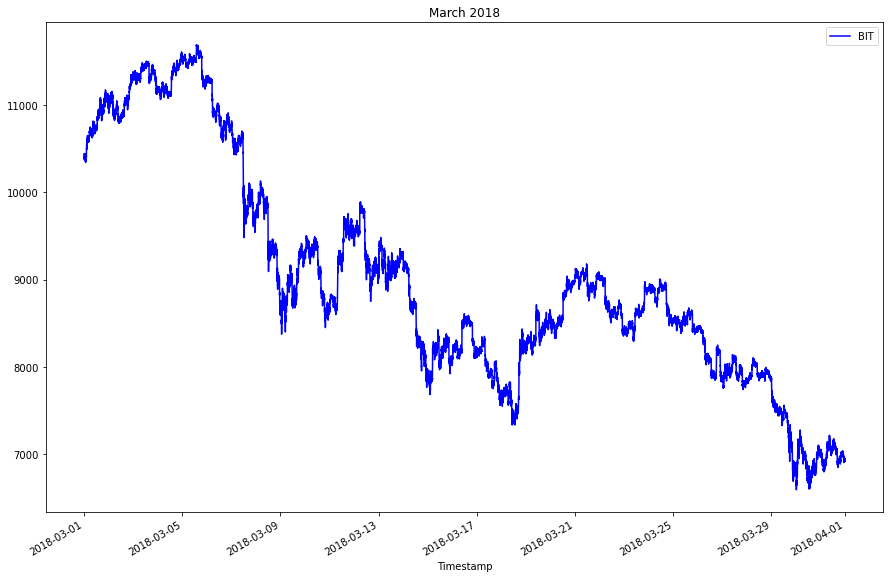

In [15]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp['Close'].loc['2018-03-01 00:00:00' : '2018-03-31 23:59:59'].plot(
    legend=True, figsize=(15, 10), title="March 2018", color="blue", label="BIT")

<AxesSubplot:title={'center':'March 2018'}, xlabel='Timestamp'>

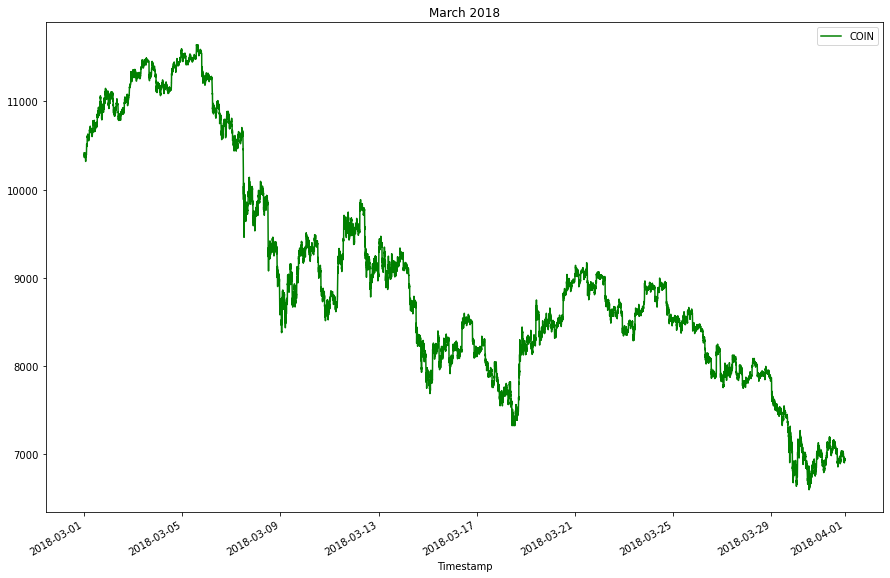

In [16]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase['Close'].loc['2018-03-01 00:00:00' : '2018-03-31 23:59:59'].plot(
    legend=True, figsize=(15, 10), title="March 2018", color="green", label="COIN")

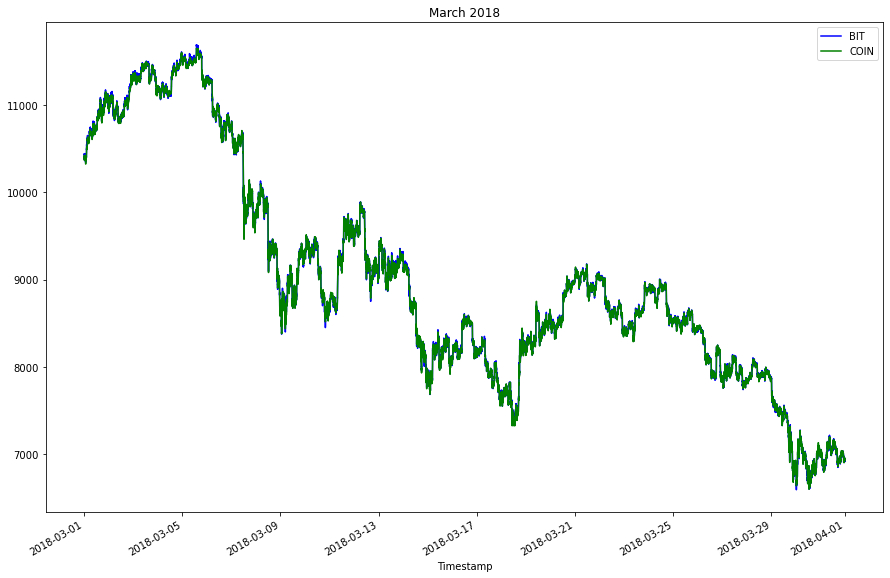

In [17]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_march = bitstamp['Close'].loc['2018-03-01 00:00:00' : '2018-03-31 23:59:59'].plot(
    legend=True, figsize=(15, 10), title="March 2018", color="blue", label="BIT")
coinbase_march = coinbase['Close'].loc['2018-03-01 00:00:00' : '2018-03-31 23:59:59'].plot(
    legend=True, figsize=(15, 10), title="March 2018", color="green", label="COIN")

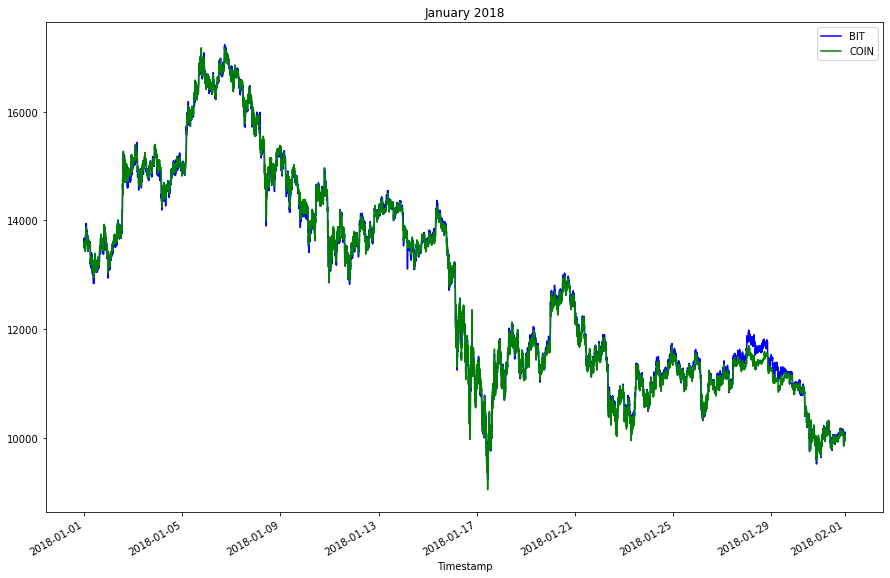

In [18]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_january = bitstamp['Close'].loc['2018-01-01 00:00:00' : '2018-01-31 23:59:59'].plot(
    legend=True, figsize=(15, 10), title="January 2018", color="blue", label="BIT")
coinbase_january = coinbase['Close'].loc['2018-01-01 00:00:00' : '2018-01-31 23:59:59'].plot(
    legend=True, figsize=(15, 10), title="January 2018", color="green", label="COIN")

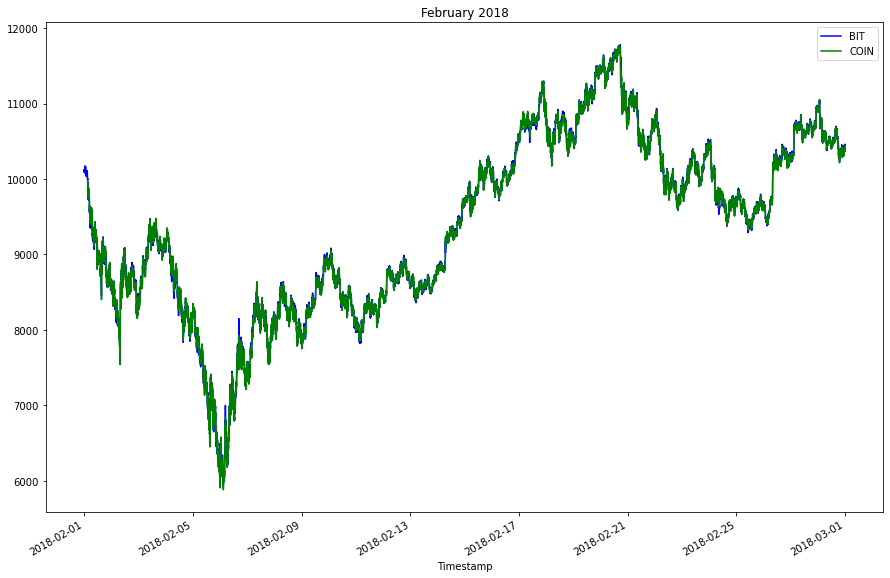

In [19]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_february = bitstamp['Close'].loc['2018-02-01 00:00:00' : '2018-02-28 23:59:59'].plot(
    legend=True, figsize=(15, 10), title="February 2018", color="blue", label="BIT")
coinbase_february = coinbase['Close'].loc['2018-02-01 00:00:00' : '2018-02-28 23:59:59'].plot(
    legend=True, figsize=(15, 10), title="February 2018", color="green", label="COIN")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Based on only the vizualizations of the different time periods, the spread does appear to tighten up as time progresses.  The largest spread seem to be at the end of January 2018.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

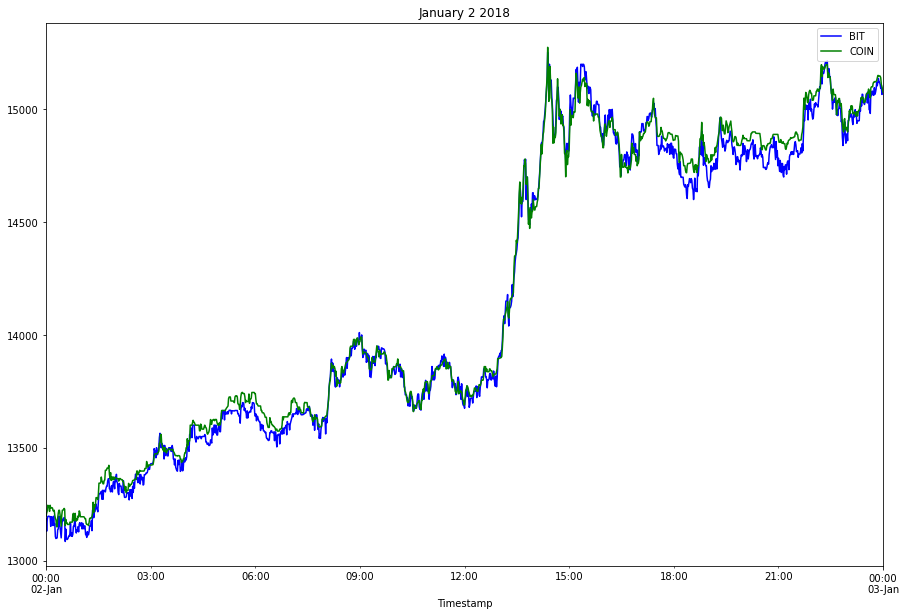

In [20]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_early = bitstamp['Close'].loc['2018-01-02 00:00:00' : '2018-01-03 00:00:00'].plot(
    legend=True, figsize=(15, 10), title="January 2 2018", color="blue", label="BIT")
coinbase_early = coinbase['Close'].loc['2018-01-02 00:00:00' : '2018-01-03 00:00:00'].plot(
    legend=True, figsize=(15, 10), title="January 2 2018", color="green", label="COIN")

In [21]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase['Close'].loc['2018-01-02'] - bitstamp['Close'].loc['2018-01-02']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1440.000000
mean       24.992396
std        40.490058
min      -110.880000
25%        -1.592500
50%        27.010000
75%        52.050000
max       148.000000
Name: Close, dtype: float64

<AxesSubplot:>

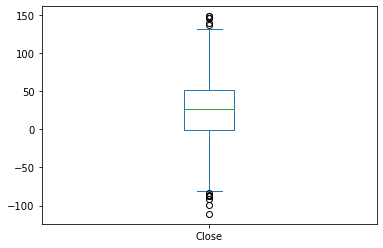

In [22]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box')

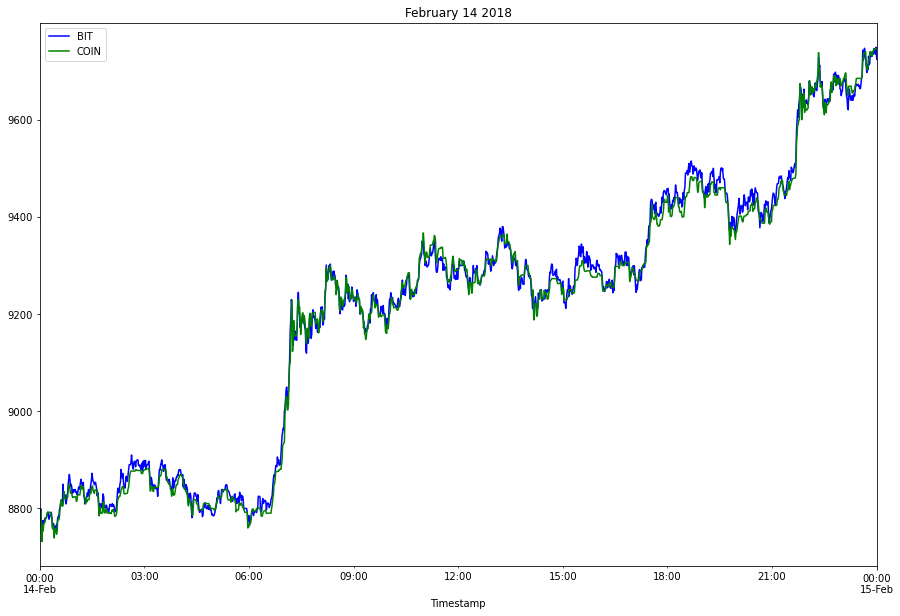

In [23]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_middle = bitstamp['Close'].loc['2018-02-14 00:00:00' : '2018-02-15 00:00:00'].plot(
    legend=True, figsize=(15, 10), title="February 14 2018", color="blue", label="BIT")
coinbase_middle= coinbase['Close'].loc['2018-02-14 00:00:00' : '2018-02-15 00:00:00'].plot(
    legend=True, figsize=(15, 10), title="February 14 2018", color="green", label="COIN")

In [24]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase['Close'].loc['2018-02-14'] - bitstamp['Close'].loc['2018-02-14']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1440.000000
mean       -6.716861
std        15.037548
min       -65.190000
25%       -17.012500
50%        -7.080000
75%         3.637500
max        33.620000
Name: Close, dtype: float64

<AxesSubplot:>

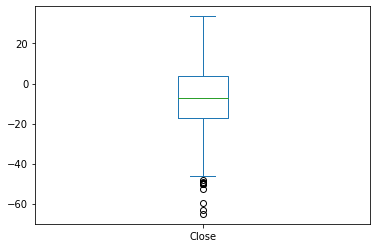

In [25]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

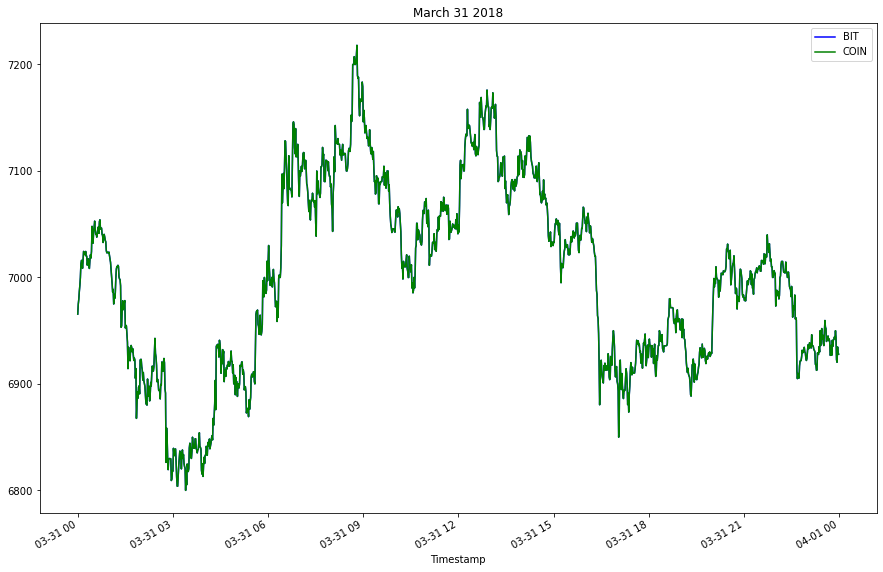

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_late = bitstamp['Close'].loc['2018-03-31 00:00:00' : '2018-04-01 00:00:00'].plot(
    legend=True, figsize=(15, 10), title="March 31 2018", color="blue", label="BIT")
coinbase_late = bitstamp['Close'].loc['2018-03-31 00:00:00' : '2018-04-01 00:00:00'].plot(
    legend=True, figsize=(15, 10), title="March 31 2018", color="green", label="COIN")

In [27]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase['Close'].loc['2018-03-31'] - bitstamp['Close'].loc['2018-03-31']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1434.000000
mean        2.348675
std         8.109623
min       -35.000000
25%        -2.537500
50%         2.300000
75%         7.627500
max        35.980000
Name: Close, dtype: float64

<AxesSubplot:>

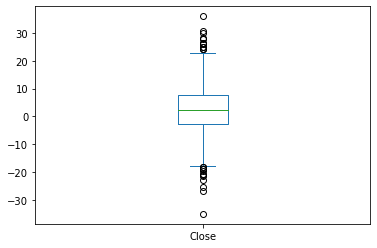

In [28]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [29]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

arbitrage_spread_early = coinbase['Close'].loc['2018-01-02'] - bitstamp['Close'].loc['2018-01-02']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0]
spread_return_early.describe()

count    1045.000000
mean       43.779694
std        28.090095
min         0.010000
25%        21.310000
50%        40.290000
75%        60.010000
max       148.000000
Name: Close, dtype: float64

In [30]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced on--middle
arbitrage_spread_middle = bitstamp['Close'].loc['2018-02-14'] - bitstamp['Close'].loc['2018-02-14']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]
spread_return_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [31]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one--late
arbitrage_spread_late = coinbase['Close'].loc['2018-03-31'] - bitstamp['Close'].loc['2018-03-31']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.
spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0]
spread_return_late.describe()

count    913.000000
mean       7.013461
std        5.438677
min        0.010000
25%        2.680000
50%        6.010000
75%       10.000000
max       35.980000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [32]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp['Close'].loc['2018-01-02']  

# Review the spread return DataFrame
spread_return_early.describe()

count    1.045000e+03
mean     3.097421e-03
std      1.945792e-03
min      7.194250e-07
25%      1.536729e-03
50%      2.923986e-03
75%      4.361745e-03
max      1.006803e-02
Name: Close, dtype: float64

In [33]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp['Close'].loc['2018-02-14']

# Review the spread return DataFrame
spread_return_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [34]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp['Close'].loc['2018-03-31']

# Review the spread return DataFrame
spread_return_late.describe()

count    913.000000
mean       0.001003
std        0.000780
min        0.000001
25%        0.000383
50%        0.000864
75%        0.001434
max        0.005167
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [35]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]
print(profitable_trades_early.count())

# Review the first five profitable trades
profitable_trades_early.head()

2


Timestamp
2018-01-02 21:08:00    0.010060
2018-01-02 21:09:00    0.010068
Name: Close, dtype: float64

In [36]:
# For the date middle in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]
print(profitable_trades_middle.count())

# Review the spread return DataFrame
spread_return_middle.head()

0


Timestamp
2018-02-14 00:00:00   NaN
2018-02-14 00:01:00   NaN
2018-02-14 00:02:00   NaN
2018-02-14 00:03:00   NaN
2018-02-14 00:04:00   NaN
Name: Close, dtype: float64

In [37]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
profitable_trades_late = spread_return_late[spread_return_late > .01]
print(profitable_trades_late.count())

# Review the spread return DataFrame
spread_return_late.head()

0


Timestamp
2018-03-31 00:00:00    0.000355
2018-03-31 00:01:00    0.000308
2018-03-31 00:02:00    0.000777
2018-03-31 00:03:00         NaN
2018-03-31 00:04:00         NaN
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [38]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%

profitable_trades_early.describe()

count    2.000000
mean     0.010064
std      0.000006
min      0.010060
25%      0.010062
50%      0.010064
75%      0.010066
max      0.010068
Name: Close, dtype: float64

In [39]:
# For the date middle in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [40]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [41]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp['Close'].loc['2018-01-02']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profitable_trades_early.describe()

count    2.000000
mean     0.010064
std      0.000006
min      0.010060
25%      0.010062
50%      0.010064
75%      0.010066
max      0.010068
Name: Close, dtype: float64

In [42]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitstamp['Close'].loc['2018-02-14']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [43]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bitstamp['Close'].loc['2018-03-31']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [44]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp['Close'].loc['2018-01-02']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-02 21:08:00    147.97
2018-01-02 21:09:00    148.00
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [45]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count      2.000000
mean     147.985000
std        0.021213
min      147.970000
25%      147.977500
50%      147.985000
75%      147.992500
max      148.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitcoin Profits'}, xlabel='Timestamp'>

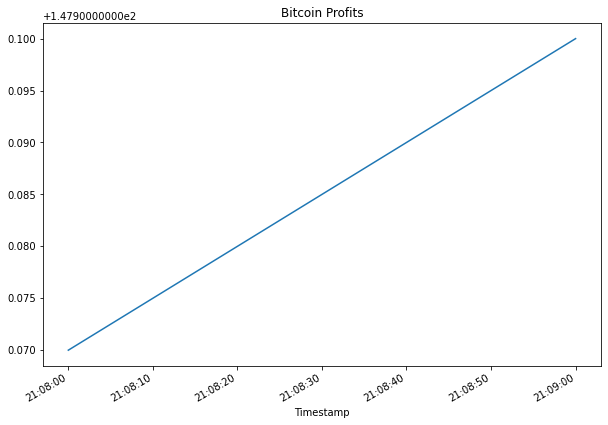

In [46]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(10, 7), title="Bitcoin Profits")

In [47]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitstamp['Close'].loc['2018-02-14']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitcoin Profits'}, xlabel='Timestamp'>

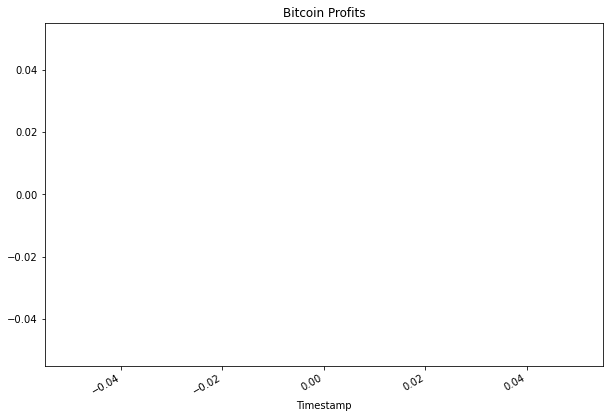

In [48]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_middle.plot(figsize=(10, 7), title="Bitcoin Profits")

In [49]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bitstamp['Close'].loc['2018-03-31']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitcoin Profits'}, xlabel='Timestamp'>

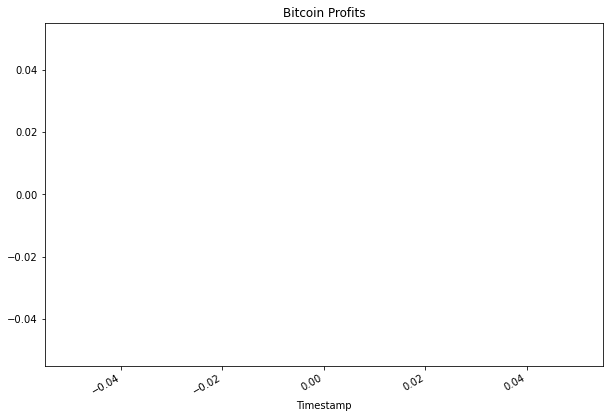

In [50]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_late.plot(figsize=(10, 7), title="Bitcoin Profits")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [51]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum = profit_per_trade_early.sum()
profit_sum

295.96999999999935

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits Early'}, xlabel='Timestamp'>

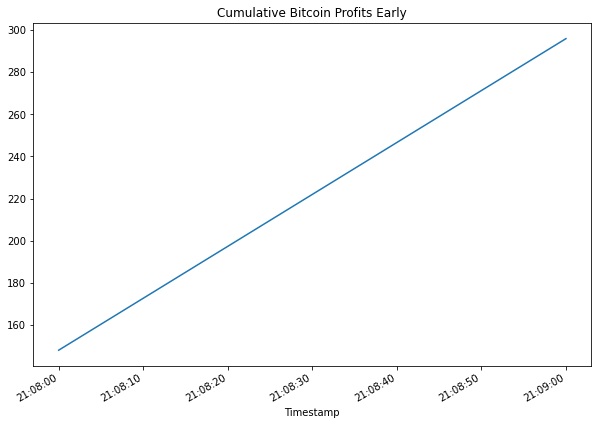

In [52]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits Early")

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits Early'}, xlabel='Timestamp'>

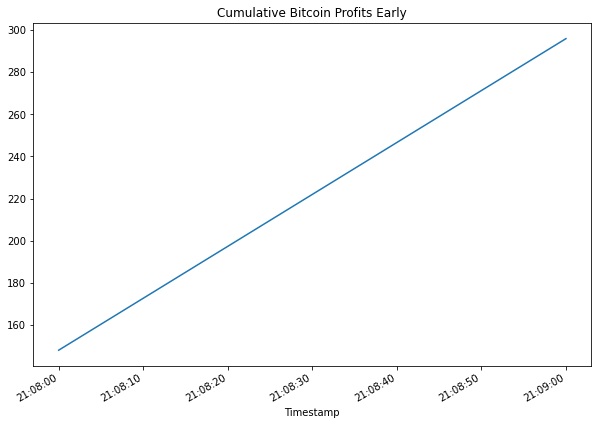

In [53]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits Early")

In [54]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()


<AxesSubplot:title={'center':'Cumulative Bitcoin Profits Middle'}, xlabel='Timestamp'>

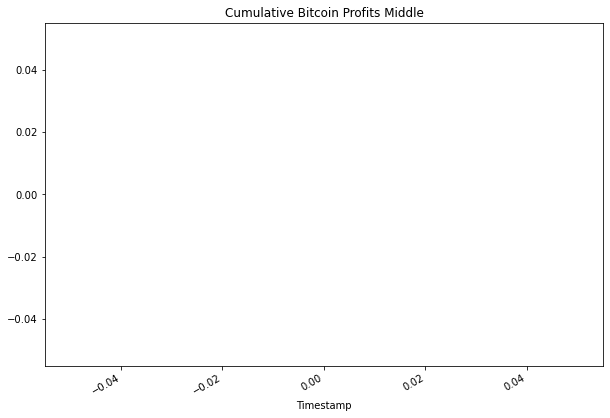

In [55]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_middle.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits Middle")


In [58]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFram
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits Middle'}, xlabel='Timestamp'>

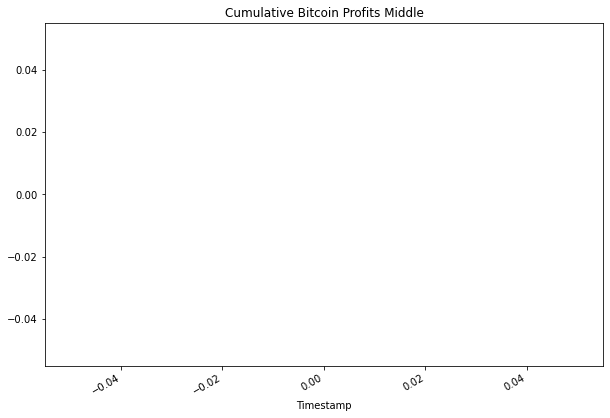

In [57]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_middle.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits Middle")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** I really cant identify too many patterns or trends since there were only 2 total profitable trades in my data set and they were both on the same day.  I did notice that the standard deviation decreased as the months went by. This can signify that spreads on profitable trades are tightening--likely with the inclusion of new entrants as time goes by. 